In [ ]:
install.packages("ISLR")
library("ISLR")
data("Carseats")
install.packages("PerformanceAnalytics")
library("PerformanceAnalytics")
install.packages("lubridate")
library("lubridate")
install.packages("kableExtra")
library("kableExtra")
options(knitr.table.format = "latex")
library(xts)

In [143]:
#Reading Data
library("datasets") 
data(PlantGrowth) 
head(PlantGrowth, n=5)

,weight,group
,<dbl>,<fct>
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


In [144]:
#Subset to trt1 and trt2

G1=as.data.frame(subset(PlantGrowth,PlantGrowth$group=="ctrl" | PlantGrowth$group=="trt1" ))
G2=subset(PlantGrowth,PlantGrowth$group=="ctrl" | PlantGrowth$group=="trt2" )
head(G1, n=5)

head(G2, n=5)

,weight,group
,<dbl>,<fct>
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


,weight,group
,<dbl>,<fct>
1,4.17,ctrl
2,5.58,ctrl
3,5.18,ctrl
4,6.11,ctrl
5,4.50,ctrl


#Q1.A. 
The difference estimator for group 1 is -0.3710 and for group 2 is 0.4940.

In [145]:
model.G1=lm(weight~group, data=G1)
summary(model.G1)


Call:
lm(formula = weight ~ group, data = G1)

Residuals:
    Min      1Q  Median      3Q     Max 
-1.0710 -0.4938  0.0685  0.2462  1.3690 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0320     0.2202  22.850 9.55e-15 ***
grouptrt1    -0.3710     0.3114  -1.191    0.249    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.6964 on 18 degrees of freedom
Multiple R-squared:  0.07308,	Adjusted R-squared:  0.02158 
F-statistic: 1.419 on 1 and 18 DF,  p-value: 0.249


In [146]:
model.G2=lm(weight~group, data=G2)
summary(model.G2)


Call:
lm(formula = weight ~ group, data = G2)

Residuals:
   Min     1Q Median     3Q    Max 
-0.862 -0.410 -0.006  0.280  1.078 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   5.0320     0.1637  30.742   <2e-16 ***
grouptrt2     0.4940     0.2315   2.134   0.0469 *  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.5176 on 18 degrees of freedom
Multiple R-squared:  0.2019,	Adjusted R-squared:  0.1576 
F-statistic: 4.554 on 1 and 18 DF,  p-value: 0.04685


#Q1.B. 
The mean for control group, treatment 1 and treatment 2 are 5.032, 4.661 and 5.526 respectively. Group 2 has the highest average weight. 

In [147]:
ctrl.mean=mean(subset(PlantGrowth,PlantGrowth$group=="ctrl" )$weight)
trt1.mean=mean(subset(PlantGrowth,PlantGrowth$group=="trt1" )$weight)
trt2.mean=mean(subset(PlantGrowth,PlantGrowth$group=="trt2" )$weight)
ctrl.mean
trt1.mean
trt2.mean
               

[1] 5.032

[1] 4.661

[1] 5.526

#Q1.C. 
I segmented into four groups. The A is Philadelphia with d=0, B is Philadelphia with d=1, C is NJ with d=0 and D is NJ with d=1.


In [196]:
wage=read.csv("Min_Wage.csv", header=TRUE)

wage$d=as.factor(wage$d)

In [149]:
A=as.data.frame(subset(wage,wage$d=="0" & wage$State=="Philadelphia" ))
B=as.data.frame(subset(wage,wage$d=="1" & wage$State=="Philadelphia" ))

C=as.data.frame(subset(wage,wage$d=="0" & wage$State=="New Jersey" ))
D=as.data.frame(subset(wage,wage$d=="1" & wage$State=="New Jersey" ))


#Q1.D

i. the means of fte for A= 23.38, B= 21.10, C=20.43, D=20.90

ii. difference in difference is 2.75


In [150]:
mean.A=round(mean(A$fte), digits=2)
mean.B=round(mean(B$fte), digits=2)

mean.C=round(mean(C$fte), digits=2)
mean.D=round(mean(D$fte), digits=2)

mean.A
mean.B
mean.C
mean.D

[1] 23.38

[1] 21.1

[1] 20.43

[1] 20.9

In [151]:
dif.in.dif=(mean.D-mean.C)-(mean.B-mean.A)
dif.in.dif

[1] 2.75

#Q1. E. 
The interaction coefficient in the output model is 2.75 which matches the number calculated above through means of groups.

In [153]:
d.in.d.reg=lm(fte~relevel(State, ref = "Philadelphia")+relevel(d, ref = "0")+relevel(State, ref = "Philadelphia")*relevel(d, ref = "0"), data=wage)
summary(d.in.d.reg)


Call:
lm(formula = fte ~ relevel(State, ref = "Philadelphia") + relevel(d, 
    ref = "0") + relevel(State, ref = "Philadelphia") * relevel(d, 
    ref = "0"), data = wage)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.097  -6.472  -0.931   4.603  64.569 

Coefficients:
                                                                      Estimate
(Intercept)                                                             23.380
relevel(State, ref = "Philadelphia")New Jersey                          -2.949
relevel(d, ref = "0")1                                                  -2.283
relevel(State, ref = "Philadelphia")New Jersey:relevel(d, ref = "0")1    2.750
                                                                      Std. Error
(Intercept)                                                                1.098
relevel(State, ref = "Philadelphia")New Jersey                             1.224
relevel(d, ref = "0")1                                                     1.55

In [ ]:
*****************************Question2**********************************

In [1]:
Berkshire=read.csv("Berkshire.csv", header=TRUE)
head(Berkshire, n=5)

,Date,BrkRet,MKT,RF
,<fct>,<dbl>,<dbl>,<dbl>
1,11/30/1976,0.1544,0.0076,0.0040
2,12/31/1976,0.1465,0.0605,0.0040
3,1/31/1977,0.0000,-0.0369,0.0036
4,2/28/1977,0.0000,-0.0160,0.0035
5,3/31/1977,0.0778,-0.0099,0.0038


#Q2.A. 
Standard deviation is 0.07

In [2]:
sd.BrkRet=round(sd(Berkshire$BrkRet), digits=2)
sd.BrkRet

[1] 0.07

#Q2.B. 
average is 0.02 or 2% per month, and over the entire period the fund has had 414,399% return increase

In [7]:
mean.BrkRet=round(mean(Berkshire$BrkRet), digits=2)
mean.BrkRet


comp.return=round((Return.cumulative(Berkshire$BrkRet)), digits=2)
comp.return

[1] 0.02

[1] 4143.99

#Q2.C. 
In average per month, Berkshire Hathway has been 2 times or 100 % better return compared to market

In [163]:
mean.MKT=round(mean(Berkshire$MKT), digits=2)
mean.MKT

(mean.BrkRet-mean.MKT)/mean.MKT*100

[1] 0.01

[1] 100

#Q3.D.
$10,000 investment at the beggining of the investemnt would have been $41,449,900 by the end of the period

In [8]:
10000*(1+4143.99)

[1] 41449900

#Q2.E.
Berkshire Hathway has had significantly larger growth than Market over the time priod.
(I can see the 100% higher return than market from graph)

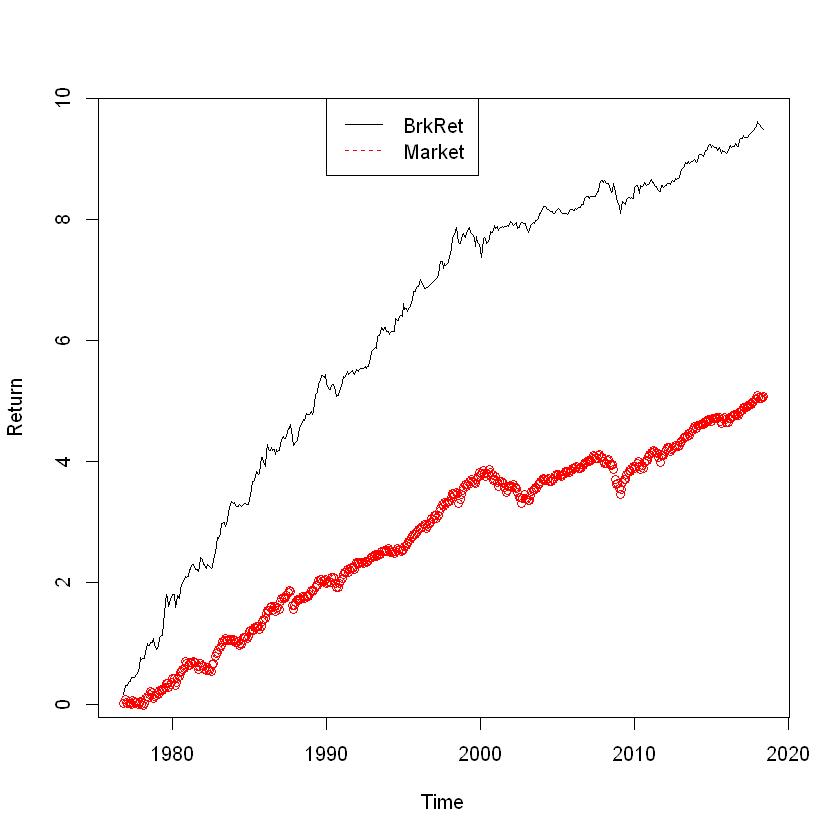

In [11]:
ts.data=ts(cumsum(Berkshire$BrkRet), start=c(1976,11), freq=12)
ts.data.1=ts(cumsum(Berkshire$MKT), start=c(1976,11), freq=12)

plot(ts.data, ylab="Return" , xlab="Time")
points(ts.data.1, col='red')
legend(x=1990, y=10, legend=c("BrkRet", "Market"), col=c("black", "red"), lty=1:2, cex=1)

#Q2.F. 
Share ratio using the sd method is 0.23. VaR Sharpe is 0.21 and ES Sharpe is 0.17

In [172]:
Berkshire$Date <- mdy(Berkshire$Date)
head(Berkshire, n=5)


All.dat <- xts(Berkshire[,-1],order.by = Berkshire[,1])

,Date,BrkRet,MKT,RF
,<date>,<dbl>,<dbl>,<dbl>
1,1976-11-30,0.1544,0.0076,0.0040
2,1976-12-31,0.1465,0.0605,0.0040
3,1977-01-31,0.0000,-0.0369,0.0036
4,1977-02-28,0.0000,-0.0160,0.0035
5,1977-03-31,0.0778,-0.0099,0.0038


In [197]:
Sharpe.ratio.B=round(SharpeRatio(All.dat$BrkRet,All.dat$RF), digits=2)
Sharpe.ratio.B

,BrkRet
"StdDev Sharpe (Rf=0.4%, p=95%):",0.23
"VaR Sharpe (Rf=0.4%, p=95%):",0.21
"ES Sharpe (Rf=0.4%, p=95%):",0.17


#Q2.G. 
The Sharpe ratio for Market is 0.15, 0.09 and 0.06 using sd, VaR and ES methods. 
The ratio of Sharpe for Berkshire and Market shows that Berkshire is 1.53, 2.33 and 2.83 times higher Sharpe ratio than market using different methods. It means Bershire has had 1.53 times higher reward per unit of risk compared to market (using sd method).

In [198]:
Sharpe.ratio.M=round(SharpeRatio(All.dat$MKT,All.dat$RF), digits=2)
Sharpe.ratio.M

round(Sharpe.ratio.B/Sharpe.ratio.M, digits=2)

,MKT
"StdDev Sharpe (Rf=0.4%, p=95%):",0.15
"VaR Sharpe (Rf=0.4%, p=95%):",0.09
"ES Sharpe (Rf=0.4%, p=95%):",0.06


,BrkRet
"StdDev Sharpe (Rf=0.4%, p=95%):",1.53
"VaR Sharpe (Rf=0.4%, p=95%):",2.33
"ES Sharpe (Rf=0.4%, p=95%):",2.83


#Q2.H. 
beta is 0.69

In [177]:
model.beta=lm(Berkshire$BrkRet~Berkshire$MKT, data=Berkshire)
summary(model.beta)


Call:
lm(formula = Berkshire$BrkRet ~ Berkshire$MKT, data = Berkshire)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17261 -0.03500 -0.00694  0.02680  0.33180 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.011891   0.002771   4.291 2.13e-05 ***
Berkshire$MKT 0.698521   0.061983  11.270  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06034 on 498 degrees of freedom
Multiple R-squared:  0.2032,	Adjusted R-squared:  0.2016 
F-statistic:   127 on 1 and 498 DF,  p-value: < 2.2e-16


#Q2.I. 
The intercept (alhpa) is 0.011 and statistically is significant. It means fund has been outperforming market by 1.08% per month.
The coeffcient (beta) is 0.69 and adjusted R squared is 0.20 which shows the fund is not very well explained by overal market behaviour and only about 20% of the fund behaviour is explained by the rest of market.

In [178]:
MKTex=Berkshire$MKT-Berkshire$RF
BrkRetex=Berkshire$BrkRet-Berkshire$RF

model.jensen=lm(BrkRetex~MKTex)
summary(model.jensen)


Call:
lm(formula = BrkRetex ~ MKTex)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.17263 -0.03475 -0.00688  0.02608  0.33062 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.010829   0.002724   3.976 8.05e-05 ***
MKTex       0.689755   0.061777  11.165  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.06025 on 498 degrees of freedom
Multiple R-squared:  0.2002,	Adjusted R-squared:  0.1986 
F-statistic: 124.7 on 1 and 498 DF,  p-value: < 2.2e-16
